# Explanatory Notebook of Project


### Names: Pranav Nalamwar, Timothy Brown, Vincenzo Donofrio

### Project: Habitable Zone Predictions

# Statement of Problem

The overall problem of this project is to analyze a host star and exoplanet data to visualize the complete planetary system and its habitable zone.

This project is important because it allows the ability to visualize a plethora of somewhat confusing parameters all in one simple plot. More importantly, however, it allows our group the opportunity to analyze a difficult data set and produce results that make sense and can serve as sort of a basic handbook for the so far analyzed exoplanets.

This project sparks interest in two aspects: its topic and its originality. The topic of creating habitable zones based on known data incites great interest to try and create a product that resembles reality. Additionally, the lack of truly reliable sources involving our objective that already exists allows us to sort of dive into the unknown and compare our nuanced approach to those limited others.

This project does, though, provide a higher level of difficulty for this course. Perhaps the most intensive part is not any of the coding (although it comes a close second), but the analysis of the involved data. This project requires us to iterate through enough data to reach a satisying conclusion, but at the same time not enough to avoid having to piece some of that data further together to reach that conclusion. To 'clean' this data will require basic to slightly higher level astrophysical knowledge which will increase the difficulty of this project. Addressing the coding of the project, as stated before, requires similar difficulty. To create an efficient model that iterates through the data and output all needed information will be difficult which is in addition to the multiple visual aids we sought for (2d, animated).

Distribution of responsibilities:

We have highlighted a total of seven responsibilities that will be distributed evenly to the members of the group. Pranav will be responsible for collecting/cleaning the data and modeling; Vincenzo will be responsible for analyzing the data for the model and implementing both the relevant theoretical and experimental physics into the model. Tim will be responsible for the visualization(output) of the project, as well as testing every aspect of the output. As a group, every member is responsible for the report of the project.

# Data We Will Use

The data we will use is titled the <em> Nasa Exoplanet Archive </em> (https://exoplanetarchive.ipac.caltech.edu). This data is likely the most qualified source on this topic. It has all the data needed and is included in an easy to read fashion. With that said, some of the data is left blank for what we can determine with two reasons. The first reason is that some of the data simply has not been collected yet as observing exoplanets is very young field, still. The other is that the source chose to leave some of the data out that can be calculated using the other data and few assumptions, a choice made probably because they would rather collect that data in time. To make up for this, we will make those few assumptions and calculate the few missing data with the known in our model which allows us to compute a more complete model.

The output of the data is shown below. All of the columns and rows are necessary for the model. The Nasa Exoplanet Archive has catalogued 4144 confirmed exoplanets from as far back as 1992 to as recent as  4/2/2020, and growing every day.

In [1]:
# necessary imports
import pandas as pd

# importing and cleaning data
exoplanetdata = pd.read_csv('dataexoplanet.csv', skiprows = 18) 
exoplanetdata['st_lum'] = exoplanetdata['st_lum'].fillna(0) # changing nan values to 0 to compute missing luminosity values manually
exoplanetdata['pl_orbsmax'] = exoplanetdata['pl_orbsmax'].fillna(0) # changing nan values to 0 to compute missing semi-major axes values manually
exoplanetdata['pl_radj'] = exoplanetdata['pl_radj'].fillna(0.25) # changing nan values to 0.25 to have data for these missing values. While we cannot manually compute
# the missing data, the best alternative is to compute the median value of the given data, which is 0.25 R-Jupiter (makes sense because most undertermined radii should be small)
exoplanetdata['st_rad'] = exoplanetdata['st_rad'].fillna(1) # changing nan values to 1 because there is no way to compute missing star radii and 
# 1 solar radii is average star size
exoplanetdata['st_teff'] = exoplanetdata['st_teff'].fillna(5720) # Changing missing star temp to 5720 K because it is temp of Sun-like star which is considered average star
exoplanetdata['pl_orbper'] = exoplanetdata['pl_orbper'].fillna(1000) # Changing missing orbital periods to 1000 days; makes sense because confirmed exoplanets with these periods will be 
# difficult to confirm because of their lengths (less data to compute); also, no way otherwise to compute period
exoplanetdata['pl_orbeccen'] = exoplanetdata['pl_orbeccen'].fillna(0) # Changing missing ecc. values to 0 because it is likely that the planet will have near zero ecc. 
exoplanetdata['st_mass'] = exoplanetdata['st_mass'].fillna(1) # Changing star mass to 1 solar mass as this is considered average star mass
exoplanetdata['pl_bmassj'] = exoplanetdata['pl_bmassj'].fillna(0.25) # Changing missing planet mass to 0.25 mass-Jupiter because a planet with
# missing mass will most likely be smaller (like the radius).
exoplanetdata = exoplanetdata.set_index('pl_hostname') # changing index to iterate through host name (star)

exoplanetdata

,pl_name,pl_pnum,pl_orbper,pl_orbsmax,pl_orbeccen,pl_bmassj,pl_radj,st_teff,st_mass,st_rad,st_lum
pl_hostname,,,,,,,,,,,
11 Com,11 Com b,1,326.030000,1.290000,0.2310,19.4000,0.25,4742.0,2.70,19.00,2.243
11 UMi,11 UMi b,1,516.219970,1.530000,0.0800,14.7400,0.25,4213.0,2.78,29.79,0.000
14 And,14 And b,1,185.840000,0.830000,0.0000,4.8000,0.25,4813.0,2.20,11.00,1.763
14 Her,14 Her b,1,1773.400020,2.930000,0.3700,4.6600,0.25,5338.0,0.90,0.93,0.000
16 Cyg B,16 Cyg B b,1,798.500000,1.660000,0.6800,1.7800,0.25,5750.0,1.08,1.13,0.000
...,...,...,...,...,...,...,...,...,...,...,...
tau Gem,tau Gem b,1,305.500000,1.170000,0.0310,20.6000,0.25,4388.0,2.30,26.80,0.000
ups And,ups And b,3,4.617033,0.059222,0.0215,0.6876,0.25,5720.0,1.30,1.56,0.000
ups And,ups And c,3,241.258000,0.827774,0.2596,1.9810,0.25,5720.0,1.30,1.56,0.000


# Model

Our model is a class that can be called with the name of a solar system or by randomly iterating throught the hostname indices that outputs various statistics about that solar system. It displays an animation that draws out their orbits and tells you whether or not those orbits are within the bounds of the habitable zone. It also outputs a non-animated version to compare to the animated version. The model is split up into three main components/sub-models: one creating and initializing the animation, one creating the parameters, and one creating the non-animated model.

## Initialzing planetary system and animation

In [2]:
# importing necessary imports - *Instructor may need to import astropy if chooses to rerun* 
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time

# imports
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd
from random import sample
from matplotlib.patches import Ellipse

In [3]:
sim_start_date = 0     # simulating a solar system starting from this date
sim_duration =  150               #  simulation duration in days

# This class is necessary to input the eventual position and velocity vectors and then plot in the animation
class Object():                   # define the objects
    def __init__(self, name, radius, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float) # position vectors
        self.v    = np.array(v, dtype=np.float) # velocity vectors
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=radius**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)
# This class initializes the planetary system and is responible for updating the animation
class PlanetarySystem():
    def __init__(self, thestar):
        self.thestar = thestar
        self.planets = []
        self.time = None
    # planet function
    def add_planet(self, planet):
        self.planets.append(planet)
    # evolving the orbits
    def evolve(self):           
        timestep = 1.0 # one day timestep - fine enough
        self.time += timestep
        plots = []
        lines = []
        # using euler-cromers to update vectors
        for p in self.planets:
            p.r += p.v * timestep # position
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2; gravitational acceleration
            p.v += acc * timestep # velocity
            # appending to the object class
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2]) # offsetting
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        return plots + lines 

The above pair of classes allows to initialize and set up both the data vectors and the animation of the planetary system. To start off though, we needed to implement the initial time settings for the animation. This included starting at zero days and letting the animation run for 150 days. The Object class sets up the main initialization of the animation portion. It initializes necessary components such as the position and vector arrays and the plotting aspects for the animation. The Planetary system class mainly sets of the updating of the animation. It starts by initializing the inputted star and planets, and then evolves to update the planet locations using the Euler-Cromer method, which is something we have learned briefly in this class. It involves calculating updating the placement of the position and velocity based on the acceleration and a fine timestep. After the updating, the vectors are then added to the plot and evolve the simulation.

# Creating the parameters

In [8]:
# creating a random star input
Star_name = exoplanetdata.sample(1)
Star_name = Star_name.index[0]


# locating planetary rows for star
Kepler_star_data = exoplanetdata.loc[[Star_name]]

# computing star luminosity
Star_Luminosity = []

if Kepler_star_data['st_lum'].iloc[0] == 0: 
    Star_Luminosity.append((Kepler_star_data['st_rad'].iloc[0]**2)*((Kepler_star_data['st_teff'].iloc[0]/5778)**4))

else:
    Star_Luminosity.append(10**(Kepler_star_data['st_lum'].iloc[0])) 

Star_Luminosity = str(Star_Luminosity)
Star_Luminosity =  Star_Luminosity.strip('[').strip(']')
Star_Luminosity = round(float(Star_Luminosity),3)

# collecting planet orbital radii
planet_axes_list = []
for i in range(len(Kepler_star_data['pl_orbsmax'])):
    if Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
        planet_axes_list.append(round(((Kepler_star_data['pl_orbper'].iloc[i]/(365))**2)**(1/3),3)) # Based off T^2 = a^3 - nice approx. for now 

    else:
        planet_axes_list.append(round(Kepler_star_data['pl_orbsmax'].iloc[i],3))
planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))

# computing the zones for habitable zones (conservative and optimistic)
# optimisitc is bigger and conservative is smaller
# limits found from (https://www.britannica.com/science/habitable-zone)
Lsun = 1.0 # Luminosity of Sun (in Solar units)
d_inner = round(0.9*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer = round(1.4*(np.sqrt(Star_Luminosity/Lsun)),3)
d_inner_opt = round(0.8*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer_opt = round(1.6*(np.sqrt(Star_Luminosity/Lsun)),3)

# Planet names
planet_index = ['b','c','d','e','f','g','h','i','j','k']
planet_index_rows = []
for i in range(len(planet_axes_list)):
    index = Star_name + planet_index[i]
    planet_index_rows.append(index)

# Eccentricity
Eccen = []
for i in range(len(planet_axes_list)):
    Eccen.append(Kepler_star_data['pl_orbeccen'].iloc[i])

# semi-minor axes
semi_minor = []
for i in range(len(planet_axes_list)):
    semi_minor.append(round(planet_axes_list[i]*np.sqrt(1-Eccen[i]),3))

#Temp of planet
Planet_temp = []
A = 0.3 # albedo
for i in planet_axes_list:
    planet_temp = Kepler_star_data['st_teff'].iloc[0]*((Kepler_star_data['st_rad'].iloc[0]/(2*i*215.032))**(1/2)*(1-A)**(1/4))
    Planet_temp.append(round(planet_temp,2))
# creating initial velocity and postion vectors   
pos = []
vel = []
for i in range(len(planet_axes_list)):
    if planet_axes_list[i] < 0.15: # this is to fix the problem with close-orbiting planets
        pos.append(([((i+1)*0.01475 + 0.15),0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(1*1.989E+30))/(((i+1)*0.01475 + 0.15)*1.496E+11))/1.731E+6)),0]))


    elif Kepler_star_data['st_mass'].iloc[0] < 0.75 and planet_axes_list[i] > 0.15:
        pos.append(([planet_axes_list[i],0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(1*1.989E+30))/(planet_axes_list[i]*1.496E+11))/1.731E+6)),0]))


    else:
        pos.append(([planet_axes_list[i],0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(Kepler_star_data['st_mass'].iloc[0]*1.989E+30))/(planet_axes_list[i]*1.496E+11))/1.731E+6)),0]))

    pass



We thought the best idea for the creation of the parameters would be to set them outside the loops. For our level of experience, this would allow for an easier time in calling all of these variables for the output. Regardless, we first have to randomly select a star, and then create its luminosity, the orbiting planets, the indices, and other planetary characterstics that all are used for the animated simulation and some of those are used for the non-animated portion. Towards the end of the above cell, we do compute the position and velocity vectors. For our model, either 2D or 3D vectors could be used, but there is no difference because we only rely on the x position and y velocity. One of the few systematic errors comes in too play here. Using this model, planets with very small orbital radii (<0.15) produce an orbital velocity that is too fast and therefore unstable for this model. We believe this is because having a very low x postion and higher y velocity causes the model to poorly handle these vectors, specifically the low (close to zero) x position. Looking into this deeper, however, we can see with the plot below the velocity in AU/day vs the orbital radius.

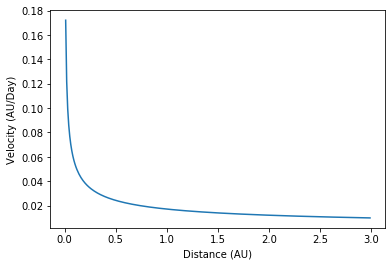

In [5]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0.01,3,0.01)
orbvel = []
for i in x:
    orbvel.append(((np.sqrt((6.67E-11*(1*1.989E+30))/(i*1.496E+11))/1.731E+6)))
plt.plot(x,orbvel)
plt.xlabel('Distance (AU)')
plt.ylabel('Velocity (AU/Day)')
plt.show()

We can see that at around 0.15 AU, the trend starts to linearly decrease, seemingly starting to show that for a given radius, the speed is around a quarter in terms of a scalar number. So, to overcome this fault, we chose to cumpute the speed of these close-orbiting planets as a quarter of their orbital distance, which produce stable orbits.

<IPython.core.display.Javascript object>


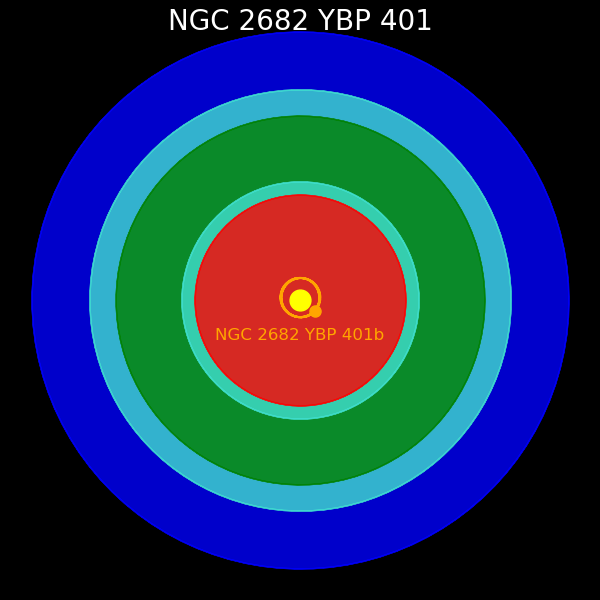

In [9]:
plt.style.use('dark_background')

fig = plt.figure(figsize=[6, 6])
# Selecting size of output based on different scenarios
if len(planet_axes_list) > 1 and planet_axes_list[-1] > d_outer:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1), ylim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1))
    title = ax.text(0, (planet_axes_list[-1]+1)*0.9, Star_name, fontsize=20, ha = 'center')

if len(planet_axes_list) == 1 and planet_axes_list[-1] > d_outer:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1), ylim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1))
    title = ax.text(0, (planet_axes_list[-1]+1)*0.9, Star_name, fontsize=20, ha = 'center')

elif len(planet_axes_list) > 1 and planet_axes_list[-1] < d_outer:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-d_outer-1, d_outer+1), ylim=(-d_outer-1, d_outer+1))
    title = ax.text(0, (d_outer+1)*0.9, Star_name, fontsize=20, ha = 'center')

else:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-d_outer-1, d_outer+1), ylim=(-d_outer-1, d_outer+1))
    title = ax.text(0, (d_outer+1)*0.9, Star_name, fontsize=20, ha = 'center')

ax = ax   
ax.set_aspect('equal')
ax.axis('off')
# calling the system and object function to create an initial star; all vector values to zero to indicate our center of mass is the center of the star
ss = PlanetarySystem(Object(Star_name, Kepler_star_data['st_rad'].iloc[0]*15, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = sim_start_date # 0 days

colors = ['gray', 'orange', 'blue', 'chocolate','grey','pink','yellow','green','blue','red'] # color of planet
colors = sample(colors, len(planet_axes_list))

# size of planets based of their radii
sizes = []
for i in range(len(planet_axes_list)):
    if Kepler_star_data['pl_radj'].iloc[i] <= 5:

        sizes.append(8)

    else:
        sizes.append(10)


names = planet_index_rows

# creating labels
texty = []
for i in range(len(planet_axes_list)):
    texty.append(planet_axes_list[i]+(0.1*(i+1)))

# creating habitable zone visuals
# red is for too hot, blue is for too cold, green is for conservative zone, turquoise is for optimistic zone
theta = np.linspace(0., 2.*np.pi, 100, endpoint=True) # For circle

x_red = d_inner_opt*np.cos(theta) # Red zone
y_red = d_inner_opt*np.sin(theta)

x_green = d_outer*np.cos(theta) # Green zone
y_green = d_outer*np.sin(theta)

x_tur_i = d_inner*np.cos(theta) # Turq. zone - inner
y_tur_i = d_inner*np.sin(theta)

x_tur_o = d_outer_opt*np.cos(theta) # Turq. zone - outer
y_tur_o = d_outer_opt*np.sin(theta)

x_blue = (d_outer_opt+0.5)*np.cos(theta) # Blue zone
y_blue = (d_outer_opt+0.5)*np.sin(theta)


ax.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
ax.fill_between(x_tur_o, y_tur_o, -y_tur_o, color='turquoise',alpha=0.8)
ax.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
ax.fill_between(x_tur_i, y_tur_i, -y_tur_i, color='turquoise',alpha=0.8)
ax.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)

# iterating through planets to plot using add_planet function and calling object
for i in range(len(planet_axes_list)):

    ss.add_planet(Object(names[i], sizes[i],colors[i],pos[i],vel[i]))

    ax.text(0, - (texty[i] + 0.2), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')
# animation function
def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()

The code above is basically the final aspect of the of the animated plot. We need to define some sizing parameters for the plot and its objects as well as call the necessary classes and parameter variables. We can also make the regions for the plot. The final 10 lines or so are used to interate through the planet list and update the animation, where an example animation is completed and shown above. Of course, more explanation on the result and what it means will be discussed later.

# Non-animated Model

Star size is 1.0 Solar units
Star size is 0.05 map units
The inner limit is 1.025  AU; the outer limit is 1.594 AU


<IPython.core.display.Javascript object>


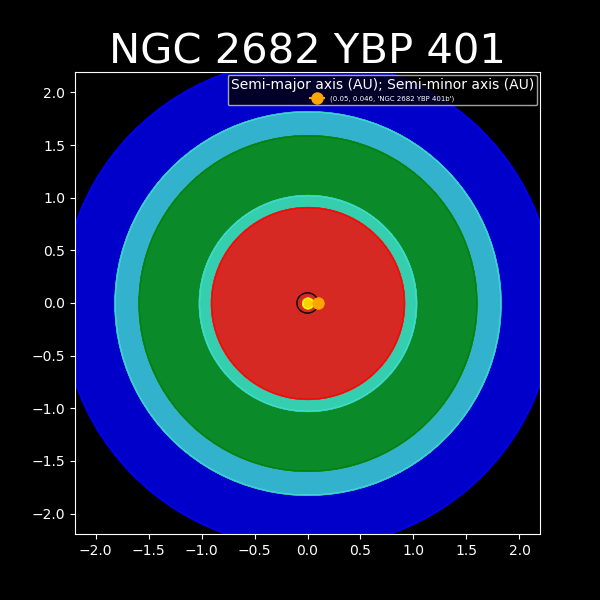

The exoplanets inlcude ['NGC 2682 YBP 401b']


,Surface Temperature (K),Jupyter-like?,Within Habitable Zone?,Habitable?
NGC 2682 YBP 401b,1216.06,Smaller,No,No


In [10]:
class generator():
    '''This class is designed to generate the habitable zones diagram for each star system'''

    def __init__(self):
        self = self
      
    
    def analysis(self):

        # star size (plot units; to show relative size of stars)
        Star_size = []

        if Kepler_star_data['st_rad'].iloc[0] >= 0 and Kepler_star_data['st_rad'].iloc[0] <= 1:
            Star_size.append(0.05)
        elif Kepler_star_data['st_rad'].iloc[0] > 1 and Kepler_star_data['st_rad'].iloc[0] <= 2:
            Star_size.append(0.15)
        elif Kepler_star_data['st_rad'].iloc[0] > 2 and Kepler_star_data['st_rad'].iloc[0] <= 5:
            Star_size.append(0.25)
        elif Kepler_star_data['st_rad'].iloc[0] > 5 and Kepler_star_data['st_rad'].iloc[0] <= 10:
            Star_size.append(0.35)
        elif Kepler_star_data['st_rad'].iloc[0] > 10:
            Star_size.append(0.45)

        Star_size = str(Star_size)
        Star_size =  Star_size.strip('[').strip(']')
        Star_size = float(Star_size)
        print('Star size is', Kepler_star_data['st_rad'].iloc[0],'Solar units')
        print('Star size is',Star_size,'map units')
        self.Star_size = Star_size
        


        # Exoplanet's semi-major axes
        planet_axes_list = []
        for i in range(len(Kepler_star_data['pl_orbsmax'])):
            if Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
                axis = (((((Kepler_star_data['pl_orbper'].iloc[i]*86400)**2)*(6.67E-11)*(Kepler_star_data['st_mass'].iloc[i]*2E+30 + Kepler_star_data['pl_bmassj'].iloc[i]*1.898E+27))/(4*np.pi**2))**(1/3))/1.496E+11
                planet_axes_list.append(round(axis,3)) 

            else:
                planet_axes_list.append(round(Kepler_star_data['pl_orbsmax'].iloc[i],3))
        planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))
        


  
        
        
        
   
        print('The inner limit is',d_inner,' AU; the outer limit is', d_outer, 'AU')


        
        
        # If planet is within 0 and 100 Celsius and within the 'green' zone
        
        Yes_No_list = []
        for i in range(len(Planet_temp)):
            if Planet_temp[i] >= 273 and Planet_temp[i] <= 373 and planet_axes_list[i] >= d_inner and planet_axes_list[i] <= d_outer:
                Yes = 'Yes'
                Yes_No_list.append(Yes)
            elif Planet_temp[i] >= 200 and Planet_temp[i] <=450 and planet_axes_list[i] >= d_inner and planet_axes_list[i] <= d_outer:
                Maybe = 'Likely'
                Yes_No_list.append(Maybe)
            else:
                No = 'No'
                Yes_No_list.append(No)
        
        self.Yes_No_list = Yes_No_list
        
        Yes_No_list_Zone = []
        for i in range(len(planet_axes_list)):
            if planet_axes_list[i] >= d_inner and planet_axes_list[i] <= d_outer:
                Yes = 'Yes'
                Yes_No_list_Zone.append(Yes)
            elif planet_axes_list[i] <= d_inner or planet_axes_list[i] >= d_outer:
                No = 'No'
                Yes_No_list_Zone.append(No)
        
        self.Yes_No_list_Zone = Yes_No_list_Zone
        
        Jupiter_list = []
        for i in range(len(planet_axes_list)):
            if Kepler_star_data['pl_radj'].iloc[i] < 0.5:
                Smaller = 'Smaller'
                Jupiter_list.append(Smaller)
            elif Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and Kepler_star_data['pl_radj'].iloc[i] < 1.5:
                Yes = 'Yes'
                Jupiter_list.append(Yes)
            elif Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
                Larger = 'Larger'
                Jupiter_list.append(Larger)
        
        self.Jupiter_list = Jupiter_list
    
        
    def plotting(self):
                

        # PLOTTING

        fig2, ax2 = plt.subplots(figsize=(6, 6)) 

            #set the limits of the figure (based on last inputted radii)
        ax2.set_xlim(-d_outer-0.6, d_outer+0.6) 
        ax2.set_ylim(-d_outer-0.6, d_outer+0.6) 
        
        xsun = (self.Star_size)*np.cos(theta) # Sun 
        ysun = (self.Star_size)*np.sin(theta)
            # Fill in habitability zones based off limits 
        ax2.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
        ax2.fill_between(x_tur_o, y_tur_o, -y_tur_o, color='turquoise',alpha=0.8)
        ax2.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
        ax2.fill_between(x_tur_i, y_tur_i, -y_tur_i, color='turquoise',alpha=0.8)
        ax2.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
        ax2.fill_between(xsun, ysun, -ysun, color='yellow',alpha=0.8)
         
            # Setting up orbits
        Circle_list = []
        for i in range(len(planet_axes_list)):
            if planet_axes_list[i] > self.Star_size: 
                Circle_index = Ellipse((0,0), width = planet_axes_list[i]*2, height = semi_minor[i]*2 , color='black', fill=False)
                Circle_list.append(Circle_index)

            elif planet_axes_list[i] <= self.Star_size:
                Circle_index = Ellipse((0,0), width = (planet_axes_list[i] + (self.Star_size))*2 ,height = (semi_minor[i] + self.Star_size)*2,color='black', fill=False)
                Circle_list.append(Circle_index)

        # Display orbits
        for i in Circle_list:
            ax2.add_artist(i)

        marker_const_x = [1,-1,0,0,1,-1,0,0,1,-1]
        marker_position_x = []
        marker_position_x_sun = []
        for i in range(len(planet_axes_list)):
            marker_position_x.append(planet_axes_list[i]*marker_const_x[i])
            marker_position_x_sun.append((planet_axes_list[i]+(self.Star_size))*marker_const_x[i])

        marker_const_y = [0,0,1,-1,0,0,1,-1,0,0]
        marker_position_y = []
        marker_position_y_sun = []
        for i in range(len(planet_axes_list)):
            marker_position_y.append(semi_minor[i]*marker_const_y[i])
            marker_position_y_sun.append((semi_minor[i]+(self.Star_size))*marker_const_y[i])

        
        for i in range(len(planet_axes_list)):

            if planet_axes_list[i] > self.Star_size and Kepler_star_data['pl_radj'].iloc[i] <= 5:
                plt.plot(marker_position_x[i],marker_position_y[i],colors[i],ms = 8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')

            elif planet_axes_list[i] > self.Star_size and Kepler_star_data['pl_radj'].iloc[i] > 5:
                plt.plot(marker_position_x[i],marker_position_y[i],colors[i],ms = 12, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')
                
            elif planet_axes_list[i] <= self.Star_size and Kepler_star_data['pl_radj'].iloc[i] <= 5:
                plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors[i],ms =8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')
            
            elif planet_axes_list[i] <= self.Star_size and Kepler_star_data['pl_radj'].iloc[i] > 5:
                plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors[i],ms = 12, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')
        
        plt.legend(title="Semi-major axis (AU); Semi-minor axis (AU)",prop={'size': 5})
        plt.title(Star_name, fontsize=30)

        print('The exoplanets inlcude', planet_index_rows)
        
        Habitability = pd.DataFrame(data = list(zip(Planet_temp,self.Jupiter_list,self.Yes_No_list_Zone,self.Yes_No_list)),index = planet_index_rows, columns = ['Surface Temperature (K)','Jupyter-like?', 'Within Habitable Zone?','Habitable?'])
        display(Habitability)
        
        plt.show()

example = generator()
example.analysis()
example.plotting()

The above large chunk of code is just some final plotting parameters and then plotting code for the non-animated model. We include this model as a sanity check for the animated model to make sure the orbits and sizes are in order. The generator class involves basically creating the different sizes and orbits of the planets and star. This code also, however, includes the pandas dataframe that outputs all the computed results that we can sift through to determine habitability. More on these results will come later. All of the plotting for both outputting results use the matplotlib package.

## Quality of model

In terms of fitting the data, the model was very appropriate. It allowed us to easily shift through the dataframe and simply allow us to compute the necessary parameters and output. The model covered every aspect of the input data and manipulated those parameters to create the expected results.

There are some other weaknesses to this model, besides the already explained vector erros for close-orbiting planets. One is the difficulty to display the correct relative size of the bodies. Of course, if we wanted exact body sizes, this would be useless because we could not see the small planets compared to the big star, which means we cannot see the planet to compare them visually to each other. Additionally, and perhaps the second most important weakness, is that for some planetary systems, the planet will not show. This is because for these few systems, the orbiting planet is very far from the star, which means that the habitable (the important output), will not be visible. There are other smaller weaknesses like leaving out binary star systems or a total center of mass (barycenter). This was intended to not over complicate the model as in the end we were more focused on the habitable zone and the planets in it, and not trying to distract from it. Besides, on our scale, a barycenter would not affect position or orbit of the planets much anyway.

The strengths of this model include a nicely pleasing results. It is a nice accomplishment for the group to be able to implement an animated model. A technique intially introduced in this course, we were pleased to create this result. While it is not necessary for our main problem, it was necessary for us to have some course-specific challenges like the animation and the implementation of multiple classes. The use of the Euler-cromer method was of this intent as, well. The Euler-cromer is a strength of this model becuase while there may be slightly better vector updating methods to use that we have learned in other classes, this was possible one of the most advanced in this course. It also is sufficient enough in its evolution and is certainly better than a stander euler method. Another strength was the realistic nature of the orbits. Whether if it was the animation using the gravitational force of the star, or the non-animated using the computed eccentricities and semi minor/major axes, this result is definitely unique especially when we compared to peers' results. A final standout for this model is the accessibility to change the ability of a random or specific output. We simple add one line of code to change between these methods, which allows for better scientific use (to specifically search a star) and not just a used for novelty (randomly generate a system).

# Testing

Testing the model in a few variations. To test the advanced, animated model, we wanted to (as previously mentioned) compare to a somewhat separate non-animated model. Since it was our initial experience in creating an animated model, we wanted to make sure it was comparable to a more experienced non-animated plot. The testing for this variation has lead us to understand that the animation is comparable and therefore sufficient.

To test the quality and result of the model, we needed to compare our results to some sources. We wanted to focus on the specific characterizations like how many planets were habitable and how many of a certain type of star is present and how many stars have planets that are in the habitable zone. If these results were similar to the sources, then we know that our model holds up. All of these testing criteria will be evaluated in the results section.

A comprehensive way to test the quality of the model was to compute the habitable zone of a system we are familiar with: the solar system. This test may be the most important; it allows us to compare a few things: the quality of the habitable zone, the quality of the orbital placements, and the quality of the animation.

The code below is a slightly modified version of our model. Since the solar system is not included in the dataset, we manually created the positon and velocity vectors using a source. We also only wanted to compare the animation, as it was not necessary to create an entire new dataframe of all the solar system data.

<IPython.core.display.Javascript object>


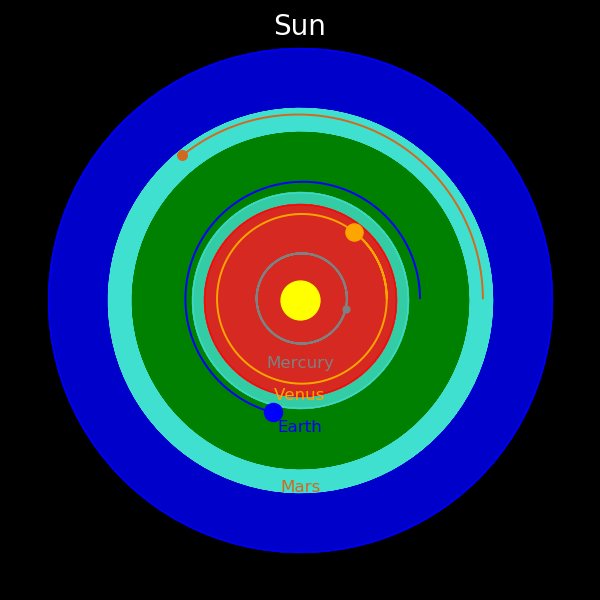

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time

sim_start_date = 0     # simulating a solar system starting from this date
sim_duration = 3 * 365                # (int) simulation duration in days


class Object:                   # define the objects
    def __init__(self, name, rad, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=rad**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class SolarSystem:
    def __init__(self, thesun):
        self.thesun = thesun
        self.planets = []
        self.time = None
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        dt = 1.0
        self.time += dt
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * dt
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * dt
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        return plots + lines

Star_Luminosity = 1.0  
Lsun = 1.0 # Luminosity of Sun (in Solar units)
d_inner = round(0.9*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer = round(1.4*(np.sqrt(Star_Luminosity/Lsun)),3)
d_inner_opt = round(0.8*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer_opt = round(1.6*(np.sqrt(Star_Luminosity/Lsun)),3)

plt.style.use('dark_background')
fig = plt.figure(figsize=[6, 6])
ax = plt.axes([0., 0., 1., 1.], xlim=(-2.5, 2.5), ylim=(-2.5, 2.5))
ax.set_aspect('equal')
ax.axis('off')


theta = np.linspace(0., 2.*np.pi, 100, endpoint=True) # For circle

x_red = d_inner_opt*np.cos(theta) # Red zone
y_red = d_inner_opt*np.sin(theta)

x_green = d_outer*np.cos(theta) # Green zone
y_green = d_outer*np.sin(theta)

x_tur_i = d_inner*np.cos(theta) # Turq. zone - inner
y_tur_i = d_inner*np.sin(theta)

x_tur_o = d_outer_opt*np.cos(theta) # Turq. zone - outer
y_tur_o = d_outer_opt*np.sin(theta)

x_blue = (d_outer_opt+0.5)*np.cos(theta) # Blue zone
y_blue = (d_outer_opt+0.5)*np.sin(theta)

xsun = (0.3)*np.cos(theta) # Sun 
ysun = (0.3)*np.sin(theta)

ax.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
ax.fill_between(x_tur_o, y_tur_o, -y_tur_o, color='turquoise',alpha=1)
ax.fill_between(x_green, y_green, -y_green, color='green',alpha=1)
ax.fill_between(x_tur_i, y_tur_i, -y_tur_i, color='turquoise',alpha=0.8)
ax.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
ss = SolarSystem(Object("Sun", 28, 'yellow', [0, 0, 0], [0, 0, 0]))
#ss = SolarSystem(Object("Sun", 14, 'white', [-0.125, -0.15, 0], [0, 0, 0]))

ss.time = sim_start_date
colors = ['gray', 'orange', 'blue', 'chocolate', 'goldenrod']
sizes = [0.38, 0.95, 1., 0.53, 2.]
names = ['Mercury', 'Venus', 'Earth', 'Mars', 'Jupiter']
texty = [.47, .73, 1, 1.5, 5.4]

pos = [[0.39, 0,0],[0.723, 0,0],[1, 0,0],[1.524, 0,0],[10, 0,0]]
vel = [[0.0, 0.027,0],[0, 0.02,0],[0, 0.017,0],[0, 0.014,0],[0, 0.00076,0]]

ax.text(0, (d_outer_opt+1)*.85, 'Sun', fontsize=20, ha = 'center')

for i in range(5):  # The 1st, 2nd, 3rd, 4th planet in solar system
    ss.add_planet(Object(names[i], 13*sizes[i],colors[i],pos[i],vel[i]))
    ax.text(0, - (texty[i] + 0.1), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')
def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()

We only plot the first four planets because the outer four are all too far away to produce a nice output. The result of this test, however, is positive. We can see that the Earth is the only planet in the conservative habitable zone, and Mars is on the very optimistic zone. All of the planets also seem to have correct orbits, with Mercury showing a slighly off-centered one, which is consistent with reality. This result allowed us to carry on with the overall results, knowing our model was consistent with a very known source.

# Results

The results will be broken up into a few parts: the basic output mode and the comparison to real-life, sourced result.

Below is the general output of a planetary system. We will change the model to predict a specified system (Kepler-62) to show a highly studied system (Kepler-62 was earlier discovery).

In [14]:
# specifically selecting Kepler-62
Star_name = 'Kepler-62'

<IPython.core.display.Javascript object>


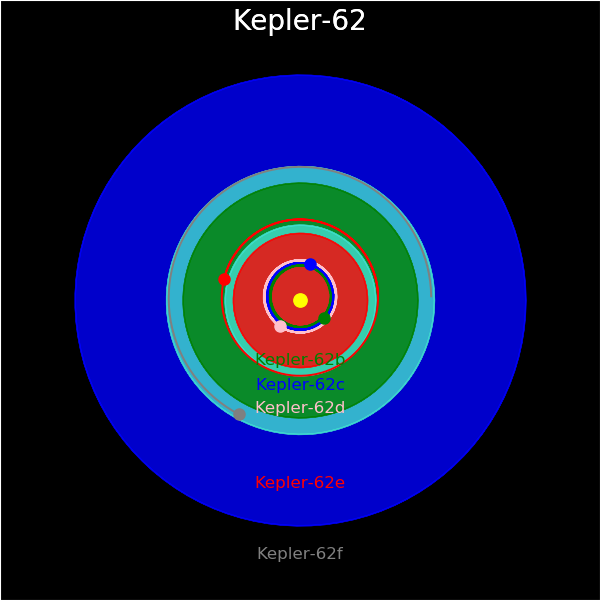

Star size is 0.64 Solar units
Star size is 0.05 map units
The inner limit is 0.412  AU; the outer limit is 0.642 AU


<IPython.core.display.Javascript object>


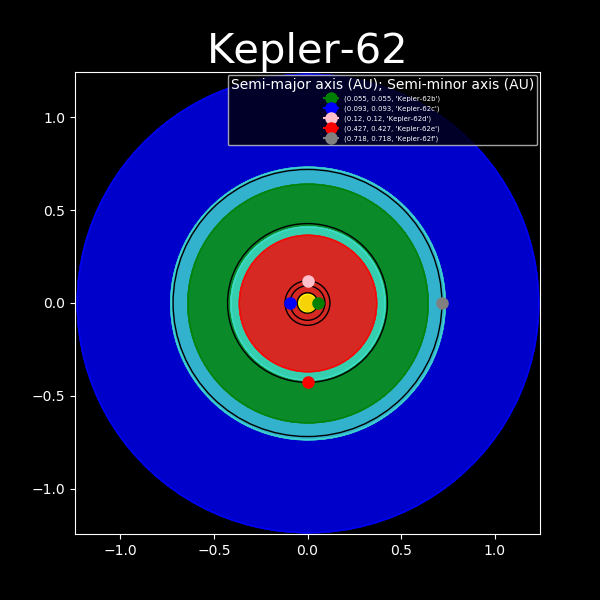

The exoplanets inlcude ['Kepler-62b', 'Kepler-62c', 'Kepler-62d', 'Kepler-62e', 'Kepler-62f']


,Surface Temperature (K),Jupyter-like?,Within Habitable Zone?,Habitable?
Kepler-62b,741.01,Smaller,No,No
Kepler-62c,569.85,Smaller,No,No
Kepler-62d,501.66,Smaller,No,No
Kepler-62e,265.94,Smaller,Yes,Likely
Kepler-62f,205.09,Smaller,No,No


In [15]:
# necessary imports
import pandas as pd


import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from astropy.time import Time

# imports
import matplotlib.pyplot as plt
import numpy as np
import random 
import pandas as pd
from random import sample
from matplotlib.patches import Ellipse

# importing and cleaning data
exoplanetdata = pd.read_csv('dataexoplanet.csv', skiprows = 18) 
exoplanetdata['st_lum'] = exoplanetdata['st_lum'].fillna(0) # changing nan values to 0 to compute missing luminosity values manually
exoplanetdata['pl_orbsmax'] = exoplanetdata['pl_orbsmax'].fillna(0) # changing nan values to 0 to compute missing semi-major axes values manually
exoplanetdata['pl_radj'] = exoplanetdata['pl_radj'].fillna(0.25) # changing nan values to 0.25 to have data for these missing values. While we cannot manually compute
# the missing data, the best alternative is to compute the median value of the given data, which is 0.25 R-Jupiter (makes sense because most undertermined radii should be small)
exoplanetdata['st_rad'] = exoplanetdata['st_rad'].fillna(1) # changing nan values to 1 because there is no way to compute missing star radii and 
# 1 solar radii is average star size
exoplanetdata['st_teff'] = exoplanetdata['st_teff'].fillna(5720) # Changing missing star temp to 5720 K because it is temp of Sun-like star which is considered average star
exoplanetdata['pl_orbper'] = exoplanetdata['pl_orbper'].fillna(1000) # Changing missing orbital periods to 1000 days; makes sense because confirmed exoplanets with these periods will be 
# difficult to confirm because of their lengths (less data to compute); also, no way otherwise to compute period
exoplanetdata['pl_orbeccen'] = exoplanetdata['pl_orbeccen'].fillna(0) # Changing missing ecc. values to 0 because it is likely that the planet will have near zero ecc. 
exoplanetdata['st_mass'] = exoplanetdata['st_mass'].fillna(1) # Changing star mass to 1 solar mass as this is considered average star mass
exoplanetdata['pl_bmassj'] = exoplanetdata['pl_bmassj'].fillna(0.25) # Changing missing planet mass to 0.25 mass-Jupiter because a planet with
# missing mass will most likely be smaller (like the radius).
exoplanetdata = exoplanetdata.set_index('pl_hostname') # changing index to iterate through host name (star)

sim_start_date = 0     # simulating a solar system starting from this date
sim_duration =  150               # (int) simulation duration in days


class Object():                   # define the objects
    def __init__(self, name, radius, color, r, v):
        self.name = name
        self.r    = np.array(r, dtype=np.float)
        self.v    = np.array(v, dtype=np.float)
        self.xs = []
        self.ys = []
        self.plot = ax.scatter(r[0], r[1], color=color, s=radius**2, edgecolors=None, zorder=10)
        self.line, = ax.plot([], [], color=color, linewidth=1.4)

class PlanetarySystem():
    def __init__(self, thestar):
        self.thestar = thestar
        self.planets = []
        self.time = None
    def add_planet(self, planet):
        self.planets.append(planet)
    def evolve(self):           # evolve the trajectories
        timestep = 1.0
        self.time += timestep
        plots = []
        lines = []
        for p in self.planets:
            p.r += p.v * timestep
            acc = -2.959e-4 * p.r / np.sum(p.r**2)**(3./2)  # in units of AU/day^2
            p.v += acc * timestep
            p.xs.append(p.r[0])
            p.ys.append(p.r[1])
            p.plot.set_offsets(p.r[:2])
            p.line.set_xdata(p.xs)
            p.line.set_ydata(p.ys)
            plots.append(p.plot)
            lines.append(p.line)
        return plots + lines
    
#Star_name = exoplanetdata.sample(1)
#Star_name = Star_name.index[0]



Kepler_star_data = exoplanetdata.loc[[Star_name]]


Star_Luminosity = []

if Kepler_star_data['st_lum'].iloc[0] == 0: 
    Star_Luminosity.append((Kepler_star_data['st_rad'].iloc[0]**2)*((Kepler_star_data['st_teff'].iloc[0]/5778)**4))

else:
    Star_Luminosity.append(10**(Kepler_star_data['st_lum'].iloc[0])) 

Star_Luminosity = str(Star_Luminosity)
Star_Luminosity =  Star_Luminosity.strip('[').strip(']')
Star_Luminosity = round(float(Star_Luminosity),3)

planet_axes_list = []
for i in range(len(Kepler_star_data['pl_orbsmax'])):
    if Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
        planet_axes_list.append(round(((Kepler_star_data['pl_orbper'].iloc[i]/(365))**2)**(1/3),3)) # Based off T^2 = a^3 - nice approx. for now 

    else:
        planet_axes_list.append(round(Kepler_star_data['pl_orbsmax'].iloc[i],3))
planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))


Lsun = 1.0 # Luminosity of Sun (in Solar units)
d_inner = round(0.9*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer = round(1.4*(np.sqrt(Star_Luminosity/Lsun)),3)
d_inner_opt = round(0.8*(np.sqrt(Star_Luminosity/Lsun)),3)
d_outer_opt = round(1.6*(np.sqrt(Star_Luminosity/Lsun)),3)

planet_index = ['b','c','d','e','f','g','h','i','j','k']
planet_index_rows = []
for i in range(len(planet_axes_list)):
    index = Star_name + planet_index[i]
    planet_index_rows.append(index)

    # Eccentricity
Eccen = []
for i in range(len(planet_axes_list)):
    Eccen.append(Kepler_star_data['pl_orbeccen'].iloc[i])


semi_minor = []
for i in range(len(planet_axes_list)):
    semi_minor.append(round(planet_axes_list[i]*np.sqrt(1-Eccen[i]),3))

Planet_temp = []
A = 0.3 # albedo
for i in planet_axes_list:
    planet_temp = Kepler_star_data['st_teff'].iloc[0]*((Kepler_star_data['st_rad'].iloc[0]/(2*i*215.032))**(1/2)*(1-A)**(1/4))
    Planet_temp.append(round(planet_temp,2))
    
pos = []
vel = []
for i in range(len(planet_axes_list)):
    if planet_axes_list[i] < 0.15:
        pos.append(([((i+1)*0.01475 + 0.15),0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(1*1.989E+30))/(((i+1)*0.01475 + 0.15)*1.496E+11))/1.731E+6)),0]))


    elif Kepler_star_data['st_mass'].iloc[0] < 0.75 and planet_axes_list[i] > 0.15:
        pos.append(([planet_axes_list[i],0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(1*1.989E+30))/(planet_axes_list[i]*1.496E+11))/1.731E+6)),0]))


    else:
        pos.append(([planet_axes_list[i],0,0]))
        vel.append(([0,((np.sqrt((6.67E-11*(Kepler_star_data['st_mass'].iloc[0]*1.989E+30))/(planet_axes_list[i]*1.496E+11))/1.731E+6)),0]))

    pass

plt.style.use('dark_background')

fig = plt.figure(figsize=[6, 6])

if len(planet_axes_list) > 1 and planet_axes_list[-1] > d_outer:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1), ylim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1))
    title = ax.text(0, (planet_axes_list[-1]+1)*0.9, Star_name, fontsize=20, ha = 'center')

if len(planet_axes_list) == 1 and planet_axes_list[-1] > d_outer:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1), ylim=(-planet_axes_list[-1]-1, planet_axes_list[-1]+1))
    title = ax.text(0, (planet_axes_list[-1]+1)*0.9, Star_name, fontsize=20, ha = 'center')

elif len(planet_axes_list) > 1 and planet_axes_list[-1] < d_outer:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-d_outer-1, d_outer+1), ylim=(-d_outer-1, d_outer+1))
    title = ax.text(0, (d_outer+1)*0.9, Star_name, fontsize=20, ha = 'center')

else:

    ax = plt.axes([0., 0., 1., 1.], xlim=(-d_outer-1, d_outer+1), ylim=(-d_outer-1, d_outer+1))
    title = ax.text(0, (d_outer+1)*0.9, Star_name, fontsize=20, ha = 'center')

ax = ax   
ax.set_aspect('equal')
ax.axis('off')
ss = PlanetarySystem(Object(Star_name, Kepler_star_data['st_rad'].iloc[0]*15, 'yellow', [0, 0, 0], [0, 0, 0]))
ss.time = sim_start_date

colors = ['gray', 'orange', 'blue', 'chocolate','grey','pink','yellow','green','blue','red'] # color of planet
colors = sample(colors, len(planet_axes_list))

sizes = []
for i in range(len(planet_axes_list)):
    if Kepler_star_data['pl_radj'].iloc[i] <= 5:

        sizes.append(8)

    else:
        sizes.append(10)


names = planet_index_rows


texty = []
for i in range(len(planet_axes_list)):
    texty.append(planet_axes_list[i]+(0.1*(i+1)))

theta = np.linspace(0., 2.*np.pi, 100, endpoint=True) # For circle

x_red = d_inner_opt*np.cos(theta) # Red zone
y_red = d_inner_opt*np.sin(theta)

x_green = d_outer*np.cos(theta) # Green zone
y_green = d_outer*np.sin(theta)

x_tur_i = d_inner*np.cos(theta) # Turq. zone - inner
y_tur_i = d_inner*np.sin(theta)

x_tur_o = d_outer_opt*np.cos(theta) # Turq. zone - outer
y_tur_o = d_outer_opt*np.sin(theta)

x_blue = (d_outer_opt+0.5)*np.cos(theta) # Blue zone
y_blue = (d_outer_opt+0.5)*np.sin(theta)


ax.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
ax.fill_between(x_tur_o, y_tur_o, -y_tur_o, color='turquoise',alpha=0.8)
ax.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
ax.fill_between(x_tur_i, y_tur_i, -y_tur_i, color='turquoise',alpha=0.8)
ax.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)

for i in range(len(planet_axes_list)):

    ss.add_planet(Object(names[i], sizes[i],colors[i],pos[i],vel[i]))

    ax.text(0, - (texty[i] + 0.2), names[i], color=colors[i], zorder=1000, ha='center', fontsize='large')

def animate(i):
    return ss.evolve()
ani = animation.FuncAnimation(fig, animate, repeat=False, frames=sim_duration, blit=True, interval=20,)
plt.show()

class generator():
    '''This class is designed to generate the habitable zones diagram for each star system'''

    def __init__(self):
        self = self
      
    
    def analysis(self):

        # star size (plot units; to show relative size of stars)
        Star_size = []

        if Kepler_star_data['st_rad'].iloc[0] >= 0 and Kepler_star_data['st_rad'].iloc[0] <= 1:
            Star_size.append(0.05)
        elif Kepler_star_data['st_rad'].iloc[0] > 1 and Kepler_star_data['st_rad'].iloc[0] <= 2:
            Star_size.append(0.15)
        elif Kepler_star_data['st_rad'].iloc[0] > 2 and Kepler_star_data['st_rad'].iloc[0] <= 5:
            Star_size.append(0.25)
        elif Kepler_star_data['st_rad'].iloc[0] > 5 and Kepler_star_data['st_rad'].iloc[0] <= 10:
            Star_size.append(0.35)
        elif Kepler_star_data['st_rad'].iloc[0] > 10:
            Star_size.append(0.45)

        Star_size = str(Star_size)
        Star_size =  Star_size.strip('[').strip(']')
        Star_size = float(Star_size)
        print('Star size is', Kepler_star_data['st_rad'].iloc[0],'Solar units')
        print('Star size is',Star_size,'map units')
        self.Star_size = Star_size
        
        # Number of exoplanets - not needed for now
        number_exo = Kepler_star_data['pl_pnum'].iloc[0]

        # Exoplanet's semi-major axes
        planet_axes_list = []
        for i in range(len(Kepler_star_data['pl_orbsmax'])):
            if Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
                axis = (((((Kepler_star_data['pl_orbper'].iloc[i]*86400)**2)*(6.67E-11)*(Kepler_star_data['st_mass'].iloc[i]*2E+30 + Kepler_star_data['pl_bmassj'].iloc[i]*1.898E+27))/(4*np.pi**2))**(1/3))/1.496E+11
                planet_axes_list.append(round(axis,3)) 

            else:
                planet_axes_list.append(round(Kepler_star_data['pl_orbsmax'].iloc[i],3))
        planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))
        


  
        
        
        
   
        print('The inner limit is',d_inner,' AU; the outer limit is', d_outer, 'AU')


        
        
        # If planet is within 0 and 100 Celsius and within the 'green' zone
        
        Yes_No_list = []
        for i in range(len(Planet_temp)):
            if Planet_temp[i] >= 273 and Planet_temp[i] <= 373 and planet_axes_list[i] >= d_inner and planet_axes_list[i] <= d_outer:
                Yes = 'Yes'
                Yes_No_list.append(Yes)
            elif Planet_temp[i] >= 200 and Planet_temp[i] <=450 and planet_axes_list[i] >= d_inner and planet_axes_list[i] <= d_outer:
                Maybe = 'Likely'
                Yes_No_list.append(Maybe)
            else:
                No = 'No'
                Yes_No_list.append(No)
        
        self.Yes_No_list = Yes_No_list
        
        Yes_No_list_Zone = []
        for i in range(len(planet_axes_list)):
            if planet_axes_list[i] >= d_inner and planet_axes_list[i] <= d_outer:
                Yes = 'Yes'
                Yes_No_list_Zone.append(Yes)
            elif planet_axes_list[i] <= d_inner or planet_axes_list[i] >= d_outer:
                No = 'No'
                Yes_No_list_Zone.append(No)
        
        self.Yes_No_list_Zone = Yes_No_list_Zone
        
        Jupiter_list = []
        for i in range(len(planet_axes_list)):
            if Kepler_star_data['pl_radj'].iloc[i] < 0.5:
                Smaller = 'Smaller'
                Jupiter_list.append(Smaller)
            elif Kepler_star_data['pl_radj'].iloc[i] >= 0.5 and Kepler_star_data['pl_radj'].iloc[i] < 1.5:
                Yes = 'Yes'
                Jupiter_list.append(Yes)
            elif Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
                Larger = 'Larger'
                Jupiter_list.append(Larger)
        
        self.Jupiter_list = Jupiter_list
    
        
    def plotting(self):
                

        # PLOTTING

        fig2, ax2 = plt.subplots(figsize=(6, 6)) 

            #set the limits of the figure (based on last inputted radii)
        ax2.set_xlim(-d_outer-0.6, d_outer+0.6) 
        ax2.set_ylim(-d_outer-0.6, d_outer+0.6) 
        
        xsun = (self.Star_size)*np.cos(theta) # Sun 
        ysun = (self.Star_size)*np.sin(theta)
            # Fill in habitability zones based off limits 
        ax2.fill_between(x_blue, y_blue, -y_blue, color='blue',alpha=0.8)
        ax2.fill_between(x_tur_o, y_tur_o, -y_tur_o, color='turquoise',alpha=0.8)
        ax2.fill_between(x_green, y_green, -y_green, color='green',alpha=0.8)
        ax2.fill_between(x_tur_i, y_tur_i, -y_tur_i, color='turquoise',alpha=0.8)
        ax2.fill_between(x_red, y_red, -y_red, color='red',alpha=0.8)
        ax2.fill_between(xsun, ysun, -ysun, color='yellow',alpha=0.8)
         
            # Setting up orbits
        Circle_list = []
        for i in range(len(planet_axes_list)):
            if planet_axes_list[i] > self.Star_size: 
                Circle_index = Ellipse((0,0), width = planet_axes_list[i]*2, height = semi_minor[i]*2 , color='black', fill=False)
                Circle_list.append(Circle_index)

            elif planet_axes_list[i] <= self.Star_size:
                Circle_index = Ellipse((0,0), width = (planet_axes_list[i] + (self.Star_size))*2 ,height = (semi_minor[i] + self.Star_size)*2,color='black', fill=False)
                Circle_list.append(Circle_index)

        # Display orbits
        for i in Circle_list:
            ax2.add_artist(i)

        marker_const_x = [1,-1,0,0,1,-1,0,0,1,-1]
        marker_position_x = []
        marker_position_x_sun = []
        for i in range(len(planet_axes_list)):
            marker_position_x.append(planet_axes_list[i]*marker_const_x[i])
            marker_position_x_sun.append((planet_axes_list[i]+(self.Star_size))*marker_const_x[i])

        marker_const_y = [0,0,1,-1,0,0,1,-1,0,0]
        marker_position_y = []
        marker_position_y_sun = []
        for i in range(len(planet_axes_list)):
            marker_position_y.append(semi_minor[i]*marker_const_y[i])
            marker_position_y_sun.append((semi_minor[i]+(self.Star_size))*marker_const_y[i])

        
        for i in range(len(planet_axes_list)):

            if planet_axes_list[i] > self.Star_size and Kepler_star_data['pl_radj'].iloc[i] <= 5:
                plt.plot(marker_position_x[i],marker_position_y[i],colors[i],ms = 8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')

            elif planet_axes_list[i] > self.Star_size and Kepler_star_data['pl_radj'].iloc[i] > 5:
                plt.plot(marker_position_x[i],marker_position_y[i],colors[i],ms = 12, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')
                
            elif planet_axes_list[i] <= self.Star_size and Kepler_star_data['pl_radj'].iloc[i] <= 5:
                plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors[i],ms =8, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')
            
            elif planet_axes_list[i] <= self.Star_size and Kepler_star_data['pl_radj'].iloc[i] > 5:
                plt.plot(marker_position_x_sun[i],marker_position_y_sun[i],colors[i],ms = 12, label = (planet_axes_list[i],semi_minor[i],planet_index_rows[i]), alpha = 1, marker = 'o')
        
        plt.legend(title="Semi-major axis (AU); Semi-minor axis (AU)",prop={'size': 5})
        plt.title(Star_name, fontsize=30)

        print('The exoplanets inlcude', planet_index_rows)
        
        Habitability = pd.DataFrame(data = list(zip(Planet_temp,self.Jupiter_list,self.Yes_No_list_Zone,self.Yes_No_list)),index = planet_index_rows, columns = ['Surface Temperature (K)','Jupyter-like?', 'Within Habitable Zone?','Habitable?'])
        display(Habitability)
        
        plt.show()

example = generator()
example.analysis()
example.plotting()


Our result shows that the only planet that is in the habitable zone and likely habitable is Kepler-62e. Comparing to a source, we can see that this output agrees with their prediction. 

The more sought after results, though, are the overall statistics of the data. We can split these up into two groups: the comparison of earth-like planets and habitability and the types of stars and habitability.

Below is an iteration through a stripped down version of the model to only compute these necessary statistics.

In [17]:
import matplotlib.pyplot as plt
plt.style.use('classic')

import numpy as np
import random 
import pandas as pd
from random import sample

# Setting up dataframe
exoplanetdata = pd.read_csv('planetnamedata.csv', skiprows = 17) 
exoplanetdata = exoplanetdata.set_index('pl_name') 
exoplanetdata['st_lum'] = exoplanetdata['st_lum'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_orbsmax'] = exoplanetdata['pl_orbsmax'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_radj'] = exoplanetdata['pl_radj'].fillna(0.25) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_rad'] = exoplanetdata['st_rad'].fillna(1) # Changing nan to 1 for eaiser indexing
exoplanetdata['st_teff'] = exoplanetdata['st_teff'].fillna(4920) # Changing nan to 4920 K for eaiser indexing
exoplanetdata['pl_orbper'] = exoplanetdata['pl_orbper'].fillna(50) # Changing nan to 50 days for eaiser indexing
exoplanetdata['pl_orbeccen'] = exoplanetdata['pl_orbeccen'].fillna(0) # Changing nan to 0 for eaiser indexing
exoplanetdata['st_mass'] = exoplanetdata['st_mass'].fillna(1) # Changing nan to 0 for eaiser indexing
exoplanetdata['pl_bmassj'] = exoplanetdata['pl_bmassj'].fillna(0.5) # Changing nan to 0 for eaiser indexing

indexplanet = exoplanetdata['pl_orbsmax'].index
planetindex = []
for i in indexplanet:
    planetindex.append(i)

# INPUT NECESSARY VALUES
#print('Input a star with known orbiting exoplanets. If you would like to explore a Kepler Star, input Kepler-(a value in') 
#print('most values in the range 4 to 1661) ex: Kepler-4. Few values in range not included, but most are. If not interested') 
#print('in Kepler, input a differently named host star.')
#Star_name = input()
#Star_name = exoplanetdata.sample(1)
#Star_name = Star_name.index[0]
class generator():
    '''This class is designed to generate the habitable zones diagram for each star system'''

    def __init__(self, planetname):
        '''Initializing object by star name'''
        #Star_name = exoplanetdata.sample(1)
        #Star_name = Star_name.index[0]
        #self.Kepler_star_data = exoplanetdata.loc[[Star_name]]
        #self.Star_name = Star_name
        self.planetname = planetname
    
    def analysis(self):
    
        #Star_name = exoplanetdata['pl_name'].index[self.planetnameint]
    
    # Locate star in dataframe
        Kepler_star_data = exoplanetdata.loc[[self.planetname]]

        Star_Luminosity = []

        if Kepler_star_data['st_lum'].iloc[0] == 0: 
            Star_Luminosity.append((Kepler_star_data['st_rad'].iloc[0]**2)*((Kepler_star_data['st_teff'].iloc[0]/5778)**4))

        else:
            Star_Luminosity.append(10**(Kepler_star_data['st_lum'].iloc[0])) 

        Star_Luminosity = str(Star_Luminosity)
        Star_Luminosity =  Star_Luminosity.strip('[').strip(']')
        Star_Luminosity = round(float(Star_Luminosity),3)

        # Exoplanet's semi-major axes
        planet_axes_list = []
        for i in range(len(Kepler_star_data['pl_orbsmax'])):
            if Kepler_star_data['pl_orbsmax'].iloc[i] == 0:
                planet_axes_list.append(round(((Kepler_star_data['pl_orbper'].iloc[i]/(365))**2)**(1/3),3)) # Based off T^2 = a^3 - nice approx. for now 
    
            else:
                planet_axes_list.append(round(Kepler_star_data['pl_orbsmax'].iloc[i],3))
        planet_axes_list = sorted(planet_axes_list, key = lambda x:float(x))



# Limits 0.9 and 1.5 are sourced from britannica.com (https://www.britannica.com/science/habitable-zone)
        Lsun = 1.0 # Luminosity of Sun (in Solar units)
        inner_limit = round(0.9*(np.sqrt(Star_Luminosity/Lsun)),3)
        outer_limit = round(1.4*(np.sqrt(Star_Luminosity/Lsun)),3)
        d_inner_opt = round(0.8*(np.sqrt(Star_Luminosity/Lsun)),3)
        d_outer_opt = round(1.6*(np.sqrt(Star_Luminosity/Lsun)),3)
    
# Creating data labels
        planet_index = ['b','c','d','e','f','g','h','i','j','k']
        planet_index_rows = []
        for i in range(len(planet_axes_list)):
            index = Star_name + planet_index[i]
            planet_index_rows.append(index)
    
        Planet_temp = []
        A = 0.3 # albedo
        for i in planet_axes_list:
            planet_temp = Kepler_star_data['st_teff'].iloc[0]*((Kepler_star_data['st_rad'].iloc[0]/(2*i*215.032))**(1/2)*(1-A)**(1/4))
            Planet_temp.append(round(planet_temp,2))

        # If planet is within 0 and 100 Celsius and within the 'green' zone
        Yes_No_list = []
        for i in range(len(Planet_temp)):
            if Planet_temp[i] >= 273 and Planet_temp[i] <= 373 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Yes = 'Yes'
                Yes_No_list.append(Yes)
            elif Planet_temp[i] >= 200 and Planet_temp[i] <=450 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Maybe = 'Likely'
                Yes_No_list.append(Maybe)
            else:
                No = 'No'
                Yes_No_list.append(No)
        
        Yes_No_list_Zone = []
        for i in range(len(planet_axes_list)):
            if planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Yes = 'Yes'
                Yes_No_list_Zone.append(Yes)
            elif planet_axes_list[i] <= inner_limit and planet_axes_list[i] >= outer_limit:
                No = 'No'
                Yes_No_list_Zone.append(No)

        Jupiter_list = []
        for i in range(len(planet_axes_list)):
            if Kepler_star_data['pl_radj'].iloc[i] < 0.25:
                Smaller = 'Smaller'
                Jupiter_list.append(Smaller)
            elif Kepler_star_data['pl_radj'].iloc[i] >= 0.25 and Kepler_star_data['pl_radj'].iloc[i] < 1.5:
                Yes = 'Yes'
                Jupiter_list.append(Yes)
            elif Kepler_star_data['pl_radj'].iloc[i] >= 1.5:
                Larger = 'Larger'
                Jupiter_list.append(Larger)
                
        Star_list = []
        for i in range(len(planet_axes_list)):
            if Star_Luminosity > 0.7 and Star_Luminosity <= 1.3 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Yes = 'Yes'
                Star_list.append(Yes)
            elif Star_Luminosity > 1.3 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                No = 'More'
                Star_list.append(No)
            elif Star_Luminosity <=0.7 and planet_axes_list[i] >= inner_limit and planet_axes_list[i] <= outer_limit:
                Less = 'Less'
                Star_list.append(Less)
    
        Star = []
        for i in range(len(planet_axes_list)):
            if Star_Luminosity > 0.7 and Star_Luminosity <= 1.3:
                #yes = 'Yes'
                Star.append(Kepler_star_data['pl_hostname'].iloc[0])
            else:
                No = 'No'
                Star.append(No)
        
        earth_like = []
        for i in range(len(planet_axes_list)):
            if Kepler_star_data['pl_radj'].iloc[i] < 0.25:
                Smaller = 'Smaller'
                earth_like.append(Smaller)
            return Yes_No_list_Zone, Yes_No_list, Jupiter_list, Star_list, Star, earth_like


Habit_yes = []
earth_like = []
earth_like_hab = []
Sun_like = []
earth_sun = []

for i in planetindex:
    Kepler_star_data = exoplanetdata.loc[[i]]

    example = generator(i)
    yes_no = example.analysis()[0]
    earth = example.analysis()[2]
    sun = example.analysis()[3]
    star = example.analysis()[4]
    earth_like_ = example.analysis()[5]
    
    if yes_no == ['Yes']:
        Habit_yes.append(yes_no)
    if star == [Kepler_star_data['pl_hostname'].iloc[0]] and earth_like_ == ['Smaller'] and yes_no == ['Yes']:
        earth_sun.append(star)
    if earth_like_ == ['Smaller'] and yes_no == ['Yes']:
        earth_like_hab.append(earth_like_)
    if star == [Kepler_star_data['pl_hostname'].iloc[0]]:   
        Sun_like.append(star)
    if earth_like_ == ['Smaller']:
        earth_like.append(earth_like_)
Sun_like_ = [] 
for i in Sun_like: 
    if i not in Sun_like_: 
        Sun_like_.append(i) 
earth_sun_ = [] 
for i in earth_sun: 
    if i not in earth_sun_: 
        earth_sun_.append(i) 

print('The number of planets in the habitable zone:',len(Habit_yes))
print('The number of earth-like planets in the dataset:',len(earth_like))
print('The number of earth-like planets in the habitable zone:',len(earth_like_hab))
print('The number of Sun-like stars in the dataset:',len(Sun_like_))
print('The number of earth-like planets orbiting Sun-like Stars in the habitable zone:',len(earth_sun_))

       

The number of planets in the habitable zone: 140
The number of earth-like planets in the dataset: 2029
The number of earth-like planets in the habitable zone: 28
The number of Sun-like stars in the dataset: 710
The number of earth-like planets orbiting Sun-like Stars in the habitable zone: 2


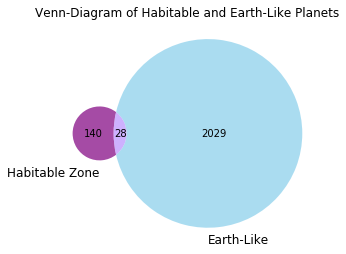

In [18]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline venn2(subsets = (len(Habit_yes), len(earth_like), len(earth_like_hab)), set_labels = ('Habitable Zone', 'Earth-Like'), set_colors=('purple', 'skyblue'), alpha = 0.7);
plt.title('Venn-Diagram of Habitable and Earth-Like Planets')
plt.show()

This plot shows that the model computed 2029 Earth-like planets and 140 total habitable planets. The earth-like planet was determined to be a maximum radius of 0.25 Jupiter-Radius. The most important quantity in this result is the total number of Earth-like habitable planets which is 28. Comparing to a source space.com (https://www.space.com/42275-habitable-exoplanets-kepler-discoveries-revised-by-gaia.html), The total number they determined was 30, using similar parametrs, which shows that our result of 28 of these planets is very close. These means that our model has performed very well in characterizing these types of planets.

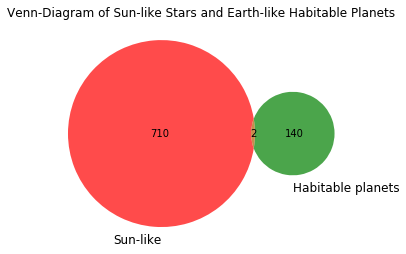

In [19]:
venn2(subsets = (len(Sun_like_), len(Habit_yes), len(earth_sun_)), set_labels = ('Sun-like', 'Habitable planets'), set_colors=('red', 'green'), alpha = 0.7);
plt.title('Venn-Diagram of Sun-like Stars and Earth-like Habitable Planets')
plt.show()

This plot shows that the model computed 710 total Sun-like stars in addition to the 140 habitable planets (within habitable zone). The important statistic here is the 2 total habitable earth like planets orbiting sun-like stars. While these stat is harded to find a source for, we can manually sift through wikipedia (https://en.wikipedia.org/wiki/List_of_potentially_habitable_exoplanets). Comparing the conservative zone planets to our conservative zone planet number (2), we can make out around 2 or 3 that fit our chosen parameters (Kepler-22b and Kepler-174d; possibly Kepler 1090-b). This means that our model was also very precise in predicting the close number of earth-like habitable planets orbiting sun-like stars.

The total numbers of 28 earth-like habitable planets and 2 earth-like habitable planets orbiting sun-like stars is a very important result to be close on because it shows how finely detailed our model is. Not only can it correctly predict a well known solar system's habitable zone, but also can iterate through the dataset and correctly predict the right amount of specified planets for a given scenario.

The result of Kepler-62's system and its close nature to a verified source is also very important. To be able to predict such a difficult system's planetary orbits and habitable zone correctly shows that this model is useful and can be used to study all of the confirmed systems as well as specific scientific questions, as confirmed above.

# Conclusions

As a total result, this project has been a success. We were able to develop a model that can iterate efficiently through the largest data set for our problem and output various plots and answer various specific questions correctly. To reflect on the project, there are some problems and we could have done some aspects differently.

The biggest problem was probably the initial quality of the data. While the dataset was the most trusted source, it still was missing a good chunk of data, mainly because it was still not entirely confirmed. While we did not want to leave these planets and systems out, we had to sacrifice by making decent enough approximations. To overocome this problem, we would either obviously wait for the data to come out or spend too much time going over very raw and unrelated to this project data which are both unnecessary options especially when decent approximations are good enough anyway. Another problem was creating better quality orbits for close-orbiting planets. This was explained above, but it is something that needs to be touched on again. It would be nice to maybe try a different position updating method like velocity verlet that was not introduced in this class to possibly create better orbits using this model, but the approximations we made for the close-orbiting planets were decent enought anyway.

Future work for this project could be implementing a 3d-model. A 3d-model would really test our skills up to this point and would be a nice challenge. While not necessarily introduced in this course, it would create a unique and nice visual for the project. Another possible addition to the model could be a more realistic planetary system. This could involve introducing binary and trinary star systems as well as computing the barycenter of the system. Computing even more realistic results can never hurt and can continue to allow us to produce great scientific results to an interesting topic like we have done with this project.

